Chapter 13
# 可视化多项式分布
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
# 导入包
from scipy.stats import multinomial
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
import os
# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

### 定义可视化函数

In [3]:
def visualize_multinomial(p_array, num = 20):
    
    
    x1_array = np.arange(num + 1)
    x2_array = np.arange(num + 1)

    xx1, xx2 = np.meshgrid(x1_array, x2_array)

    xx3 = num - xx1 - xx2
    xx3 = np.where(xx3 >= 0.0, xx3, np.nan)

    PMF_ff = multinomial.pmf(x=np.array(([xx1.ravel(), xx2.ravel(), xx3.ravel()])).T, 
                             n=num, p=p_array)

    PMF_ff = np.where(PMF_ff > 0.0, PMF_ff, np.nan)

    PMF_ff = np.reshape(PMF_ff, xx1.shape)


    fig = plt.figure(figsize=(5, 5))
    ax = plt.axes(projection="3d")

    scatter_plot = ax.scatter3D(xx1.ravel(), xx2.ravel(), xx3.ravel(), 
                 s = 50,
                 marker='.',
                 alpha = 1,
                 c=PMF_ff.ravel(), 
                 cmap = 'RdYlBu_r')

    ax.set_proj_type('ortho')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('$x_3$')
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

    ax.set_xticks([0,num])
    ax.set_yticks([0,num])
    ax.set_zticks([0,num])

    ax.set_xlim(0, num)
    ax.set_ylim(0, num)
    ax.set_zlim3d(0, num)
    ax.view_init(azim=30, elev=30)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('$x_3$')
    ax.set_box_aspect(aspect = (1,1,1))

    ax.grid()
    # fig.colorbar(scatter_plot, ax = ax, shrink = 0.5, aspect = 10)
    title = '_'.join(str(round(p_i,2)) for p_i in p_array)
    title = 'p_array_' + title

    fig.savefig('Figures/' + title + '.svg', format='svg')
    

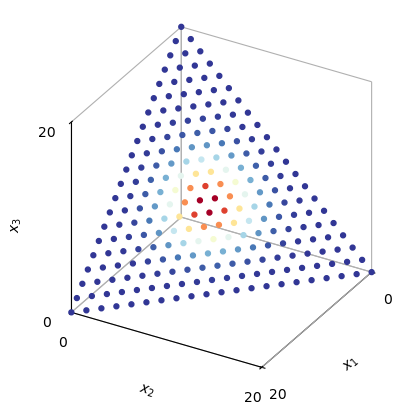

In [4]:
p_array = [1/3, 1/3, 1/3]

visualize_multinomial(p_array)

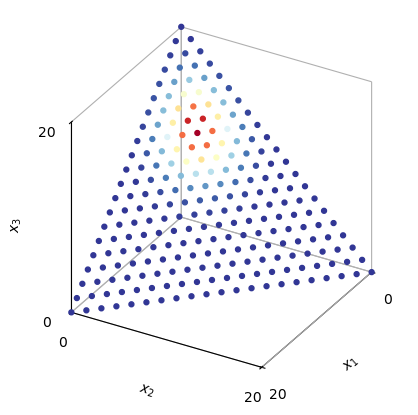

In [5]:
p_array = [0.2, 0.2, 0.6]

visualize_multinomial(p_array)

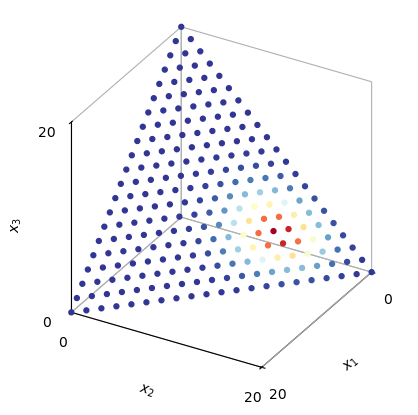

In [6]:
p_array = [0.2, 0.6, 0.2]

visualize_multinomial(p_array)

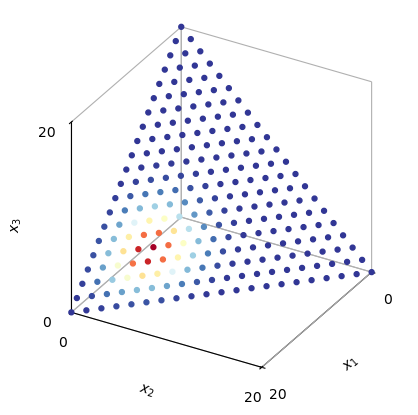

In [7]:
p_array = [0.6, 0.2, 0.2]

visualize_multinomial(p_array)

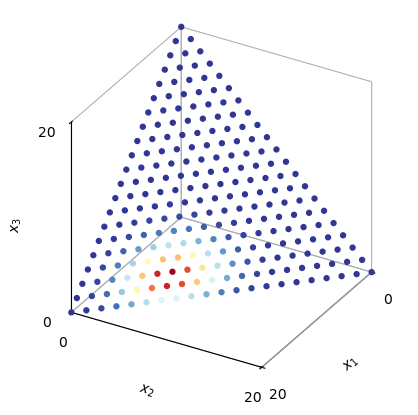

In [8]:
p_array = [0.6, 0.3, 0.1]

visualize_multinomial(p_array)

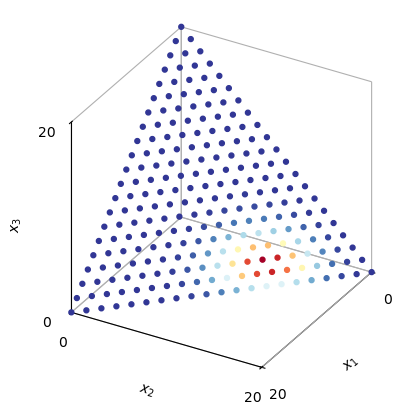

In [9]:
p_array = [0.3, 0.6, 0.1]

visualize_multinomial(p_array)

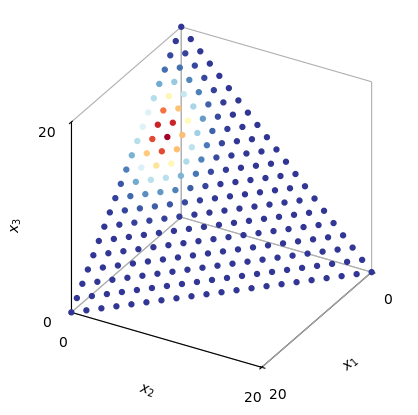

In [10]:
p_array = [0.3, 0.1, 0.6]

visualize_multinomial(p_array)

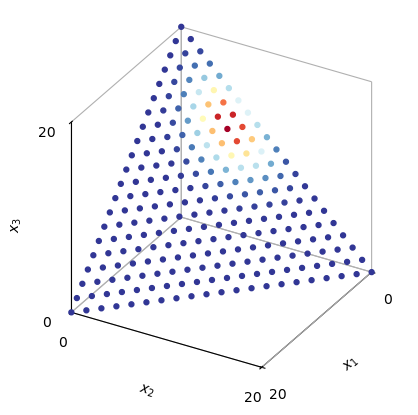

In [11]:
p_array = [0.1, 0.3, 0.6]

visualize_multinomial(p_array)

In [12]:
# Repo: https://github.com/Visualize-ML
# Book 2 Beauty of Visualization  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023